# Swirl
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536
Image swirling is a non-linear image deformation that creates a whirlpool effect. This example describes the implementation of this transform in skimage, as well as the underlying warp mechanism.

Consider the coordinate $(x,y)$ in the output image. The reverse mapping for the swirl transformation first computes, relative to a center $(x_0,y_0)$, its polar coordinates,

$$ \theta=\text{arctan}(y/x)$$

$$ \rho=\sqrt{(x−x_0)^2+(y−y_0)^2} $$

and then transforms them according to

$$ r=\text{ln}(2).\text{radius}/5 $$

$$ \phi=\text{rotations} $$

$$s=\text{strength}$$

$$ \theta′=\phi+s.e^{-\rho/r+\theta} $$

where $\text{strength}$ is a parameter for the amount of swirl, $\text{radius}$ indicates the swirl extent in pixels, and $\text{rotation}$ adds a rotation angle. The transformation of radius into $r$ is to ensure that the transformation decays to $~1/1000^{th}$ within the specified radius.

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl

### Show

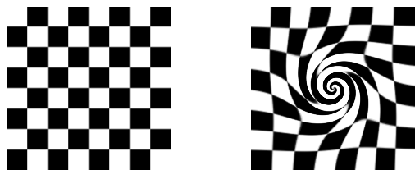

In [2]:
image = data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray, interpolation='none')
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray, interpolation='none')
ax1.axis('off')

plt.show()

### Varying `rotation`

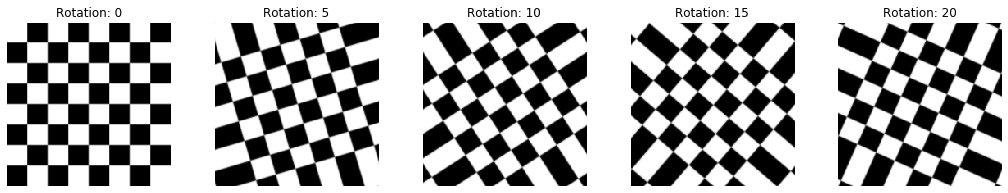

In [9]:
image = data.checkerboard()
rot = [5*i for i in range(5)]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 3),
                                   sharex=True, sharey=True)

for i,r in enumerate(rot):
    swirled = swirl(image, rotation=r, strength=0, radius=120)
    axes[i].imshow(swirled, cmap=plt.cm.gray, interpolation='none')
    axes[i].axis('off')
    axes[i].set_title("Rotation: {}".format(r))

plt.show()

### Varying `strength`

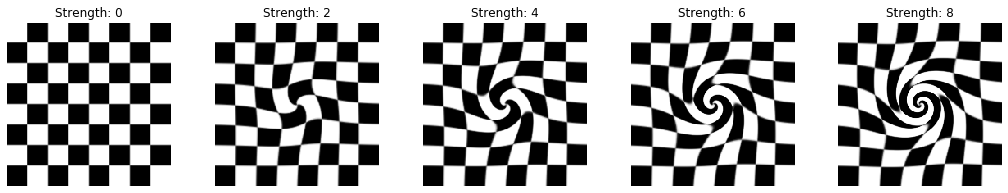

In [11]:
image = data.checkerboard()
st = [2*i for i in range(5)]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 3),
                                   sharex=True, sharey=True)

for i,s in enumerate(st):
    swirled = swirl(image, rotation=0, strength=s, radius=120)
    axes[i].imshow(swirled, cmap=plt.cm.gray, interpolation='none')
    axes[i].axis('off')
    axes[i].set_title("Strength: {}".format(s))

plt.show()

### What's the impact of `radius`?

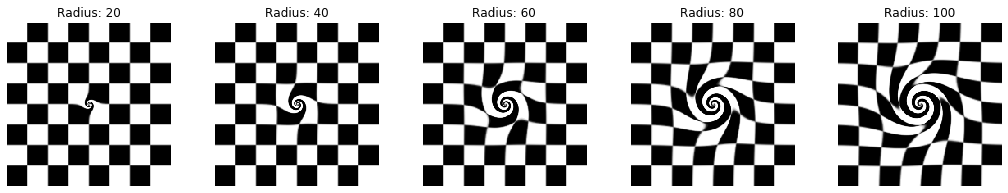

In [12]:
image = data.checkerboard()
rad = [20*i for i in range(1,6)]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 3),
                                   sharex=True, sharey=True)

for i,r in enumerate(rad):
    swirled = swirl(image, rotation=0, strength=10, radius=r)
    axes[i].imshow(swirled, cmap=plt.cm.gray, interpolation='none')
    axes[i].axis('off')
    axes[i].set_title("Radius: {}".format(r))

plt.show()